In [1]:
%load_ext autoreload
%autoreload 2

from src import __root__
%cd $__root__

/home/xlluo/hdd/ML-fracture


In [ ]:
# %cd ..

# Random Split

In [2]:
from src.core.model import *

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

configfile = "base_SNL_MSU_DOE_fatigue"
trainer = Trainer(device=device)
trainer.load_config(configfile)
trainer.load_data()
trainer.train(verbose=True)

models = [
    MLP(trainer),
    ThisWork(trainer),
    ThisWork(trainer, manual_activate=["linlogSN"], program="ThisWorklinlog"),
    ThisWork(trainer, manual_activate=["loglogSN"], program="ThisWorkloglog"),
    ThisWorkPretrain(trainer, manual_activate=["linlogSN"]),
]

trainer.add_modelbases(models)
# trainer.bayes_opt=True
trainer.train(verbose=True)

Using cpu device
{
	'project': 'SNL_MSU_DOE_fatigue',
	'loss': 'mse',
	'bayes_opt': False,
	'bayes_epoch': 3,
	'patience': 50,
	'epoch': 200,
	'lr': 0.003,
	'weight_decay': 0.002,
	'batch_size': 1024,
	'static_params': {
		'patience': 50,
		'epoch': 200
	},
	'chosen_params': {
		'lr': 0.003,
		'weight_decay': 0.002,
		'batch_size': 1024
	},
	'layers': [
		16,
		64,
		128,
		128,
		64,
		16
	],
	'n_calls': 100,
	'SPACEs': {
		'lr': {
			'type': 'Real',
			'low': 0.001,
			'high': 0.05,
			'prior': 'log-uniform'
		},
		'weight_decay': {
			'type': 'Real',
			'low': 1e-05,
			'high': 0.05,
			'prior': 'log-uniform'
		},
		'batch_size': {
			'type': 'Categorical',
			'categories': [
				32,
				64,
				128,
				256,
				512,
				1024,
				2048,
				4096
			]
		}
	},
	'data_splitter': 'RandomSplitter',
	'data_processors': [
		'IQRRemover',
		'MeanImputer',
		'SingleValueFeatureRemover',
		'UnscaledDataRecorder',
		'StandardScaler'
	],
	'data_derivers': {
		'MinStressDeriver': {
			'derived_

### S-N curve

More than one values of each stress unrelated column are found [('Frequency', [2.0, 3.0, 1.0, 4.0, 5.0]), ('Fibre Volumn Fraction', [57.0, 55.1, 56.6, 56.1, 54.4, 54.5, 55.9, 55.3, 56.4]), ('Thickness', [3.3, 3.42, 3.45, 3.33, 3.35, 3.37, 3.4, 3.34])]. Bootstrapped prediction of SN curves may be incorrect.
ThisWork CI
Training 15/15
Validation 6/6
Testing 6/6
Lin-log CI
Training 15/15
Validation 6/6
Testing 6/6
Log-log CI
Training 15/15
Validation 6/6
Testing 6/6


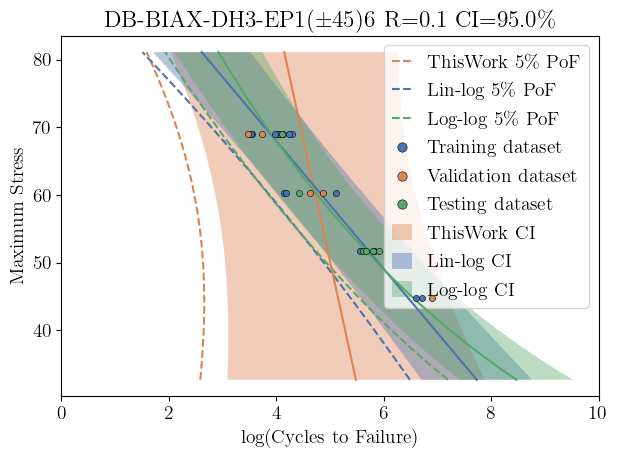

In [5]:
trainer.plot_S_N(m_code='DB-BIAX-DH3-EP1(±45)6', s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=2, r_value=0.1, load_dir='tension', verbose=False, program="ThisWorklinlog", refit=True)

ThisWork CI
Training 12/12
Validation 1/1
Testing 6/6
Lin-log CI
Training 12/12
Validation 1/1
Testing 6/6
Log-log CI
Training 12/12
Validation 1/1
Testing 6/6


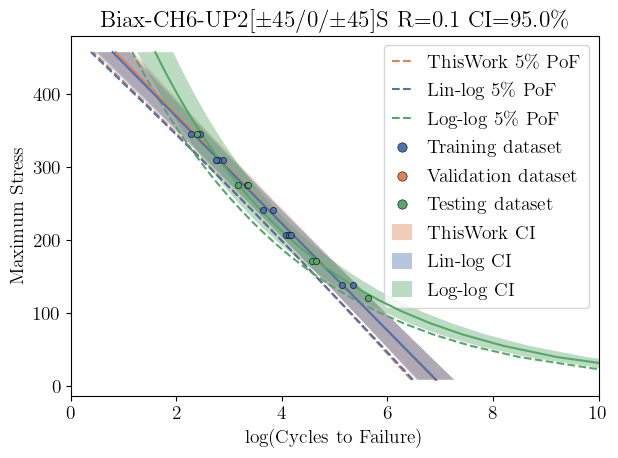

In [8]:
trainer.plot_S_N(m_code='Biax-CH6-UP2[±45/0/±45]S', s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=2, r_value=0.1, load_dir='tension', verbose=False, program="ThisWorkPretrain", refit=True)

In [ ]:
trainer.plot_multiple_S_N(m_codes=['Triax-AA-UP2[(±45/0)3/(0/±45)2]','MD-DD5P-UP2[0/±45/0]S','MD-ELT5500-VE3[±45/0/±45/0/±45]','DB-BIAX-DH3-EP1(±45)6','DB-BIAX-DH3-EP1(+/-45)3S','UNI-D155-EP3[0]','UNI-D155B-UP2[0]5','Biax-CH6-UP2[±45/0/±45]S'], s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=10, r_value=0.1, load_dir='tension', verbose=False)
trainer.plot_multiple_S_N(m_codes=['Triax-AA-UP2[(±45/0)3/(0/±45)2]','MD-DD5P-UP2[0/±45/0]S','MD-ELT5500-VE3[±45/0/±45/0/±45]','DB-BIAX-DH3-EP1(±45)6','DB-BIAX-DH3-EP1(+/-45)3S','UNI-D155-EP3[0]','UNI-D155B-UP2[0]5','Biax-CH6-UP2[±45/0/±45]S'], s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=10, r_value=0.1, load_dir='tension', verbose=False, program="ThisWorklinlog", model_name="ThisWork")
trainer.plot_multiple_S_N(m_codes=['Triax-AA-UP2[(±45/0)3/(0/±45)2]','MD-DD5P-UP2[0/±45/0]S','MD-ELT5500-VE3[±45/0/±45/0/±45]','DB-BIAX-DH3-EP1(±45)6','DB-BIAX-DH3-EP1(+/-45)3S','UNI-D155-EP3[0]','UNI-D155B-UP2[0]5','Biax-CH6-UP2[±45/0/±45]S'], s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=10, r_value=0.1, load_dir='tension', verbose=False, program="ThisWorkloglog", model_name="ThisWork")
trainer.plot_multiple_S_N(m_codes=['Triax-AA-UP2[(±45/0)3/(0/±45)2]','MD-DD5P-UP2[0/±45/0]S','MD-ELT5500-VE3[±45/0/±45/0/±45]','DB-BIAX-DH3-EP1(±45)6','DB-BIAX-DH3-EP1(+/-45)3S','UNI-D155-EP3[0]','UNI-D155B-UP2[0]5','Biax-CH6-UP2[±45/0/±45]S'], s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=10, r_value=0.1, load_dir='tension', verbose=False, program="MLP", model_name="MLP")

# Cycle split

In [ ]:
from src.core.datasplitter import CycleSplitter
from src.core.model import *

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

configfile = "base_SNL_MSU_DOE_fatigue"
trainer = Trainer(device=device)
trainer.load_config(configfile)
trainer.datasplitter = CycleSplitter()
trainer.load_data()
trainer.train(verbose=True)

models = [
    AutoGluon(trainer),
    MLP(trainer),
    ThisWork(trainer),
    ThisWork(trainer, manual_activate=["linlogSN"], program="ThisWorklinlog"),
    ThisWork(trainer, manual_activate=["loglogSN"], program="ThisWorkloglog"),
]

trainer.add_modelbases(models)
# trainer.bayes_opt=True
trainer.train(verbose=True)

In [ ]:
trainer.plot_multiple_S_N(m_codes=['Triax-AA-UP2[(±45/0)3/(0/±45)2]','MD-DD5P-UP2[0/±45/0]S','MD-ELT5500-VE3[±45/0/±45/0/±45]','DB-BIAX-DH3-EP1(±45)6','DB-BIAX-DH3-EP1(+/-45)3S','UNI-D155-EP3[0]','UNI-D155B-UP2[0]5','Biax-CH6-UP2[±45/0/±45]S'], s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=10,  r_value=0.1, load_dir='tension', verbose=False)
trainer.plot_multiple_S_N(m_codes=['Triax-AA-UP2[(±45/0)3/(0/±45)2]','MD-DD5P-UP2[0/±45/0]S','MD-ELT5500-VE3[±45/0/±45/0/±45]','DB-BIAX-DH3-EP1(±45)6','DB-BIAX-DH3-EP1(+/-45)3S','UNI-D155-EP3[0]','UNI-D155B-UP2[0]5','Biax-CH6-UP2[±45/0/±45]S'], s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=10, r_value=0.1, load_dir='tension', verbose=False, program="ThisWorklinlog", model_name="ThisWork")
trainer.plot_multiple_S_N(m_codes=['Triax-AA-UP2[(±45/0)3/(0/±45)2]','MD-DD5P-UP2[0/±45/0]S','MD-ELT5500-VE3[±45/0/±45/0/±45]','DB-BIAX-DH3-EP1(±45)6','DB-BIAX-DH3-EP1(+/-45)3S','UNI-D155-EP3[0]','UNI-D155B-UP2[0]5','Biax-CH6-UP2[±45/0/±45]S'], s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=10, r_value=0.1, load_dir='tension', verbose=False, program="ThisWorkloglog", model_name="ThisWork")
trainer.plot_multiple_S_N(m_codes=['Triax-AA-UP2[(±45/0)3/(0/±45)2]','MD-DD5P-UP2[0/±45/0]S','MD-ELT5500-VE3[±45/0/±45/0/±45]','DB-BIAX-DH3-EP1(±45)6','DB-BIAX-DH3-EP1(+/-45)3S','UNI-D155-EP3[0]','UNI-D155B-UP2[0]5','Biax-CH6-UP2[±45/0/±45]S'], s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=10, r_value=0.1, load_dir='tension', verbose=False, program="MLP", model_name="MLP")

In [ ]:
trainer.plot_truth_pred(log_trans=True, upper_lim=9, program='MLP')
trainer.plot_truth_pred(log_trans=True, upper_lim=9, program='ThisWork')
trainer.plot_truth_pred(log_trans=True, upper_lim=9, program='ThisWorklinlog')
trainer.plot_truth_pred(log_trans=True, upper_lim=9, program='ThisWorkloglog')
with HiddenPltShow():
    trainer.plot_truth_pred(log_trans=True, upper_lim=9, program='AutoGluon')

# Material Cycle split

In [ ]:
from src.core.datasplitter import MaterialCycleSplitter
from src.core.model import *

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

configfile = "base_SNL_MSU_DOE_fatigue"
trainer = Trainer(device=device)
trainer.load_config(configfile)
trainer.datasplitter = MaterialCycleSplitter()
trainer.load_data()
trainer.train(verbose=True)

models = [
    # AutoGluon(trainer),
    MLP(trainer),
    ThisWork(trainer),
    ThisWork(trainer, manual_activate=["linlogSN"], program="ThisWorklinlog"),
    ThisWork(trainer, manual_activate=["loglogSN"], program="ThisWorkloglog"),
]

trainer.add_modelbases(models)
# trainer.bayes_opt=True
trainer.train(verbose=True)

In [ ]:
trainer.modelbases[1].model.component_weights

In [ ]:
trainer.plot_S_N(m_code='Biax-CH6-UP2[±45/0/±45]S', s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=2, r_value=0.1, load_dir='tension', verbose=False, program="ThisWorkloglog", refit=True)

In [ ]:
trainer.plot_S_N(m_code='DB-BIAX-DH3-EP1(±45)6', s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=2, r_value=0.1, load_dir='tension', verbose=False, program="MLP", model_name="MLP", refit=False)

In [ ]:
trainer.modelbases[1].model.component_weights

In [ ]:
trainer.plot_S_N(m_code='Biax-CH6-UP2[±45/0/±45]S', s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=2, r_value=0.1, load_dir='tension', verbose=False, program="ThisWorkloglog", refit=True)

In [ ]:
trainer.plot_S_N(m_code='DB-BIAX-DH3-EP1(±45)6', s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=2, r_value=0.1, load_dir='tension', verbose=False, program="MLP", model_name="MLP", refit=False)

In [ ]:
trainer.modelbases[1].model.component_weights

In [ ]:
trainer.plot_S_N(m_code='Biax-CH6-UP2[±45/0/±45]S', s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=2, r_value=0.1, load_dir='tension', verbose=False, program="ThisWorkloglog", refit=True)

In [ ]:
trainer.plot_S_N(m_code='DB-BIAX-DH3-EP1(±45)6', s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=2, r_value=0.1, load_dir='tension', verbose=False, program="MLP", model_name="MLP", refit=False)

In [ ]:
trainer.modelbases[1].model.component_weights

In [ ]:
trainer.plot_S_N(m_code='Biax-CH6-UP2[±45/0/±45]S', s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=2, r_value=0.1, load_dir='tension', verbose=False, program="ThisWorkloglog", refit=True)

In [ ]:
trainer.plot_S_N(m_code='DB-BIAX-DH3-EP1(±45)6', s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=2, r_value=0.1, load_dir='tension', verbose=False, program="MLP", model_name="MLP", refit=False)

In [ ]:
trainer.plot_multiple_S_N(m_codes=['Triax-AA-UP2[(±45/0)3/(0/±45)2]','MD-DD5P-UP2[0/±45/0]S','MD-ELT5500-VE3[±45/0/±45/0/±45]','DB-BIAX-DH3-EP1(±45)6','DB-BIAX-DH3-EP1(+/-45)3S','UNI-D155-EP3[0]','UNI-D155B-UP2[0]5','Biax-CH6-UP2[±45/0/±45]S'], s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=10,  r_value=0.1, load_dir='tension', verbose=False)
trainer.plot_multiple_S_N(m_codes=['Triax-AA-UP2[(±45/0)3/(0/±45)2]','MD-DD5P-UP2[0/±45/0]S','MD-ELT5500-VE3[±45/0/±45/0/±45]','DB-BIAX-DH3-EP1(±45)6','DB-BIAX-DH3-EP1(+/-45)3S','UNI-D155-EP3[0]','UNI-D155B-UP2[0]5','Biax-CH6-UP2[±45/0/±45]S'], s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=10, r_value=0.1, load_dir='tension', verbose=False, program="ThisWorklinlog", model_name="ThisWork")
trainer.plot_multiple_S_N(m_codes=['Triax-AA-UP2[(±45/0)3/(0/±45)2]','MD-DD5P-UP2[0/±45/0]S','MD-ELT5500-VE3[±45/0/±45/0/±45]','DB-BIAX-DH3-EP1(±45)6','DB-BIAX-DH3-EP1(+/-45)3S','UNI-D155-EP3[0]','UNI-D155B-UP2[0]5','Biax-CH6-UP2[±45/0/±45]S'], s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=10, r_value=0.1, load_dir='tension', verbose=False, program="ThisWorkloglog", model_name="ThisWork")
trainer.plot_multiple_S_N(m_codes=['Triax-AA-UP2[(±45/0)3/(0/±45)2]','MD-DD5P-UP2[0/±45/0]S','MD-ELT5500-VE3[±45/0/±45/0/±45]','DB-BIAX-DH3-EP1(±45)6','DB-BIAX-DH3-EP1(+/-45)3S','UNI-D155-EP3[0]','UNI-D155B-UP2[0]5','Biax-CH6-UP2[±45/0/±45]S'], s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=10, r_value=0.1, load_dir='tension', verbose=False, program="MLP", model_name="MLP")

In [ ]:
trainer.plot_truth_pred(log_trans=True, upper_lim=9, program='MLP')
trainer.plot_truth_pred(log_trans=True, upper_lim=9, program='ThisWork')
trainer.plot_truth_pred(log_trans=True, upper_lim=9, program='ThisWorklinlog')
trainer.plot_truth_pred(log_trans=True, upper_lim=9, program='ThisWorkloglog')
with HiddenPltShow():
    trainer.plot_truth_pred(log_trans=True, upper_lim=9, program='AutoGluon')

In [ ]:
from src.core.datasplitter import MaterialCycleSplitter
from src.core.model import *

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

configfile = "base_SNL_MSU_DOE_fatigue"
trainer = Trainer(device=device)
trainer.load_config(configfile)
trainer.datasplitter = MaterialCycleSplitter()
trainer.load_data()
trainer.train(verbose=True)

models = [
    ThisWork(trainer, manual_activate=["linlogSN"]),
]

trainer.add_modelbases(models)
# trainer.bayes_opt=True
trainer.train(verbose=True)

In [ ]:
trainer.modelbases[1].model.component_weights

In [ ]:
trainer.plot_S_N(m_code='Biax-CH6-UP2[±45/0/±45]S', s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=2, r_value=0.1, load_dir='tension', verbose=False, program="ThisWorkloglog", refit=True)

In [ ]:
trainer.plot_S_N(m_code='DB-BIAX-DH3-EP1(±45)6', s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=2, r_value=0.1, load_dir='tension', verbose=False, program="MLP", model_name="MLP", refit=False)

In [ ]:
trainer.modelbases[1].model.component_weights

In [ ]:
trainer.plot_S_N(m_code='Biax-CH6-UP2[±45/0/±45]S', s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=2, r_value=0.1, load_dir='tension', verbose=False, program="ThisWorkloglog", refit=True)

In [ ]:
trainer.plot_S_N(m_code='DB-BIAX-DH3-EP1(±45)6', s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=2, r_value=0.1, load_dir='tension', verbose=False, program="MLP", model_name="MLP", refit=False)

In [ ]:
trainer.modelbases[1].model.component_weights

In [ ]:
trainer.plot_S_N(m_code='Biax-CH6-UP2[±45/0/±45]S', s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=2, r_value=0.1, load_dir='tension', verbose=False, program="ThisWorkloglog", refit=True)

In [ ]:
trainer.plot_S_N(m_code='DB-BIAX-DH3-EP1(±45)6', s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=2, r_value=0.1, load_dir='tension', verbose=False, program="MLP", model_name="MLP", refit=False)

In [ ]:
trainer.modelbases[1].model.component_weights

In [ ]:
trainer.plot_S_N(m_code='Biax-CH6-UP2[±45/0/±45]S', s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=2, r_value=0.1, load_dir='tension', verbose=False, program="ThisWorkloglog", refit=True)

In [ ]:
trainer.plot_S_N(m_code='DB-BIAX-DH3-EP1(±45)6', s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=2, r_value=0.1, load_dir='tension', verbose=False, program="MLP", model_name="MLP", refit=False)

In [ ]:
from src.core.datasplitter import MaterialCycleSplitter
from src.core.model import *

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

configfile = "base_SNL_MSU_DOE_fatigue"
trainer = Trainer(device=device)
trainer.load_config(configfile)
trainer.datasplitter = MaterialCycleSplitter()
trainer.load_data()
trainer.train(verbose=True)

models = [
    # AutoGluon(trainer),
    MLP(trainer),
    ThisWork(trainer),
    ThisWork(trainer, manual_activate=["linlogSN"], program="ThisWorklinlog"),
    ThisWork(trainer, manual_activate=["loglogSN"], program="ThisWorkloglog"),
]

trainer.add_modelbases(models)
# trainer.bayes_opt=True
trainer.train(verbose=True)

In [ ]:
trainer.modelbases[1].model.component_weights

In [ ]:
trainer.plot_S_N(m_code='Biax-CH6-UP2[±45/0/±45]S', s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=2, r_value=0.1, load_dir='tension', verbose=False, program="ThisWorkloglog", refit=True)

In [ ]:
trainer.plot_S_N(m_code='DB-BIAX-DH3-EP1(±45)6', s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=2, r_value=0.1, load_dir='tension', verbose=False, program="MLP", model_name="MLP", refit=False)

In [ ]:
trainer.modelbases[1].model.component_weights

In [ ]:
trainer.plot_S_N(m_code='Biax-CH6-UP2[±45/0/±45]S', s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=2, r_value=0.1, load_dir='tension', verbose=False, program="ThisWorkloglog", refit=True)

In [ ]:
trainer.plot_S_N(m_code='DB-BIAX-DH3-EP1(±45)6', s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=2, r_value=0.1, load_dir='tension', verbose=False, program="MLP", model_name="MLP", refit=False)

In [ ]:
trainer.modelbases[1].model.component_weights

In [ ]:
trainer.plot_S_N(m_code='Biax-CH6-UP2[±45/0/±45]S', s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=2, r_value=0.1, load_dir='tension', verbose=False, program="ThisWorkloglog", refit=True)

In [ ]:
trainer.plot_S_N(m_code='DB-BIAX-DH3-EP1(±45)6', s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=2, r_value=0.1, load_dir='tension', verbose=False, program="MLP", model_name="MLP", refit=False)

In [ ]:
trainer.modelbases[1].model.component_weights

In [ ]:
trainer.plot_S_N(m_code='Biax-CH6-UP2[±45/0/±45]S', s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=2, r_value=0.1, load_dir='tension', verbose=False, program="ThisWorkloglog", refit=True)

In [ ]:
trainer.plot_S_N(m_code='DB-BIAX-DH3-EP1(±45)6', s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=2, r_value=0.1, load_dir='tension', verbose=False, program="MLP", model_name="MLP", refit=False)

In [ ]:
trainer.plot_multiple_S_N(m_codes=['Triax-AA-UP2[(±45/0)3/(0/±45)2]','MD-DD5P-UP2[0/±45/0]S','MD-ELT5500-VE3[±45/0/±45/0/±45]','DB-BIAX-DH3-EP1(±45)6','DB-BIAX-DH3-EP1(+/-45)3S','UNI-D155-EP3[0]','UNI-D155B-UP2[0]5','Biax-CH6-UP2[±45/0/±45]S'], s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=10,  r_value=0.1, load_dir='tension', verbose=False)
trainer.plot_multiple_S_N(m_codes=['Triax-AA-UP2[(±45/0)3/(0/±45)2]','MD-DD5P-UP2[0/±45/0]S','MD-ELT5500-VE3[±45/0/±45/0/±45]','DB-BIAX-DH3-EP1(±45)6','DB-BIAX-DH3-EP1(+/-45)3S','UNI-D155-EP3[0]','UNI-D155B-UP2[0]5','Biax-CH6-UP2[±45/0/±45]S'], s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=10, r_value=0.1, load_dir='tension', verbose=False, program="ThisWorklinlog", model_name="ThisWork")
trainer.plot_multiple_S_N(m_codes=['Triax-AA-UP2[(±45/0)3/(0/±45)2]','MD-DD5P-UP2[0/±45/0]S','MD-ELT5500-VE3[±45/0/±45/0/±45]','DB-BIAX-DH3-EP1(±45)6','DB-BIAX-DH3-EP1(+/-45)3S','UNI-D155-EP3[0]','UNI-D155B-UP2[0]5','Biax-CH6-UP2[±45/0/±45]S'], s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=10, r_value=0.1, load_dir='tension', verbose=False, program="ThisWorkloglog", model_name="ThisWork")
trainer.plot_multiple_S_N(m_codes=['Triax-AA-UP2[(±45/0)3/(0/±45)2]','MD-DD5P-UP2[0/±45/0]S','MD-ELT5500-VE3[±45/0/±45/0/±45]','DB-BIAX-DH3-EP1(±45)6','DB-BIAX-DH3-EP1(+/-45)3S','UNI-D155-EP3[0]','UNI-D155B-UP2[0]5','Biax-CH6-UP2[±45/0/±45]S'], s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=10, r_value=0.1, load_dir='tension', verbose=False, program="MLP", model_name="MLP")

In [ ]:
trainer.plot_truth_pred(log_trans=True, upper_lim=9, program='MLP')
trainer.plot_truth_pred(log_trans=True, upper_lim=9, program='ThisWork')
trainer.plot_truth_pred(log_trans=True, upper_lim=9, program='ThisWorklinlog')
trainer.plot_truth_pred(log_trans=True, upper_lim=9, program='ThisWorkloglog')
with HiddenPltShow():
    trainer.plot_truth_pred(log_trans=True, upper_lim=9, program='AutoGluon')

In [ ]:
from src.core.datasplitter import MaterialCycleSplitter
from src.core.model import *

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

configfile = "base_SNL_MSU_DOE_fatigue"
trainer = Trainer(device=device)
trainer.load_config(configfile)
trainer.datasplitter = MaterialCycleSplitter()
trainer.load_data()
trainer.train(verbose=True)

models = [
    ThisWork(trainer, manual_activate=["linlogSN"]),
]

trainer.add_modelbases(models)
# trainer.bayes_opt=True
trainer.train(verbose=True)

In [ ]:
trainer.modelbases[1].model.component_weights

In [ ]:
trainer.plot_S_N(m_code='Biax-CH6-UP2[±45/0/±45]S', s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=2, r_value=0.1, load_dir='tension', verbose=False, program="ThisWorkloglog", refit=True)

In [ ]:
trainer.plot_S_N(m_code='DB-BIAX-DH3-EP1(±45)6', s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=2, r_value=0.1, load_dir='tension', verbose=False, program="MLP", model_name="MLP", refit=False)

In [ ]:
trainer.modelbases[1].model.component_weights

In [ ]:
trainer.plot_S_N(m_code='Biax-CH6-UP2[±45/0/±45]S', s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=2, r_value=0.1, load_dir='tension', verbose=False, program="ThisWorkloglog", refit=True)

In [ ]:
trainer.plot_S_N(m_code='DB-BIAX-DH3-EP1(±45)6', s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=2, r_value=0.1, load_dir='tension', verbose=False, program="MLP", model_name="MLP", refit=False)

In [ ]:
trainer.modelbases[1].model.component_weights

In [ ]:
trainer.plot_S_N(m_code='Biax-CH6-UP2[±45/0/±45]S', s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=2, r_value=0.1, load_dir='tension', verbose=False, program="ThisWorkloglog", refit=True)

In [ ]:
trainer.plot_S_N(m_code='DB-BIAX-DH3-EP1(±45)6', s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=2, r_value=0.1, load_dir='tension', verbose=False, program="MLP", model_name="MLP", refit=False)

In [14]:
trainer.modelbases[1].model.component_weights

Parameter containing:
tensor([[0.0389],
        [0.0907],
        [0.1041]], requires_grad=True)

ThisWork CI
Training 11/12
Validation 3/3
Testing 2/4
Lin-log CI
Training 12/12
Validation 3/3
Testing 3/4
Log-log CI
Training 12/12
Validation 3/3
Testing 1/4


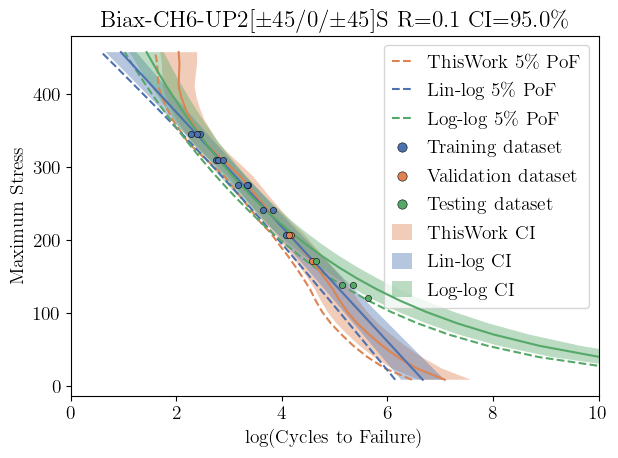

In [3]:
trainer.plot_S_N(m_code='Biax-CH6-UP2[±45/0/±45]S', s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=2, r_value=0.1, load_dir='tension', verbose=False, program="ThisWorkloglog", refit=True)

ThisWork CI
Training 16/16
Validation 4/4
Testing 5/7
Lin-log CI
Training 16/16
Validation 3/4
Testing 3/7
Log-log CI
Training 16/16
Validation 3/4
Testing 6/7


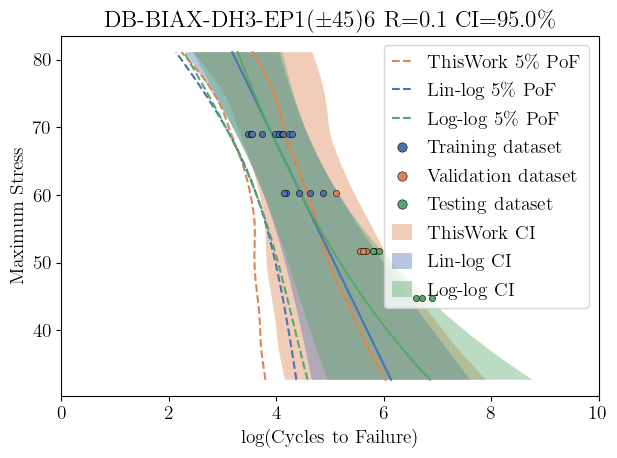

In [4]:
trainer.plot_S_N(m_code='DB-BIAX-DH3-EP1(±45)6', s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=2, r_value=0.1, load_dir='tension', verbose=False, program="MLP", model_name="MLP", refit=False)

In [ ]:
trainer.plot_multiple_S_N(m_codes=['Triax-AA-UP2[(±45/0)3/(0/±45)2]','MD-DD5P-UP2[0/±45/0]S','MD-ELT5500-VE3[±45/0/±45/0/±45]','DB-BIAX-DH3-EP1(±45)6','DB-BIAX-DH3-EP1(+/-45)3S','UNI-D155-EP3[0]','UNI-D155B-UP2[0]5','Biax-CH6-UP2[±45/0/±45]S'], s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=10,  r_value=0.1, load_dir='tension', verbose=False)
trainer.plot_multiple_S_N(m_codes=['Triax-AA-UP2[(±45/0)3/(0/±45)2]','MD-DD5P-UP2[0/±45/0]S','MD-ELT5500-VE3[±45/0/±45/0/±45]','DB-BIAX-DH3-EP1(±45)6','DB-BIAX-DH3-EP1(+/-45)3S','UNI-D155-EP3[0]','UNI-D155B-UP2[0]5','Biax-CH6-UP2[±45/0/±45]S'], s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=10, r_value=0.1, load_dir='tension', verbose=False, program="ThisWorklinlog", model_name="ThisWork")
trainer.plot_multiple_S_N(m_codes=['Triax-AA-UP2[(±45/0)3/(0/±45)2]','MD-DD5P-UP2[0/±45/0]S','MD-ELT5500-VE3[±45/0/±45/0/±45]','DB-BIAX-DH3-EP1(±45)6','DB-BIAX-DH3-EP1(+/-45)3S','UNI-D155-EP3[0]','UNI-D155B-UP2[0]5','Biax-CH6-UP2[±45/0/±45]S'], s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=10, r_value=0.1, load_dir='tension', verbose=False, program="ThisWorkloglog", model_name="ThisWork")
trainer.plot_multiple_S_N(m_codes=['Triax-AA-UP2[(±45/0)3/(0/±45)2]','MD-DD5P-UP2[0/±45/0]S','MD-ELT5500-VE3[±45/0/±45/0/±45]','DB-BIAX-DH3-EP1(±45)6','DB-BIAX-DH3-EP1(+/-45)3S','UNI-D155-EP3[0]','UNI-D155B-UP2[0]5','Biax-CH6-UP2[±45/0/±45]S'], s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=10, r_value=0.1, load_dir='tension', verbose=False, program="MLP", model_name="MLP")

In [ ]:
trainer.plot_truth_pred(log_trans=True, upper_lim=9, program='MLP')
trainer.plot_truth_pred(log_trans=True, upper_lim=9, program='ThisWork')
trainer.plot_truth_pred(log_trans=True, upper_lim=9, program='ThisWorklinlog')
trainer.plot_truth_pred(log_trans=True, upper_lim=9, program='ThisWorkloglog')
with HiddenPltShow():
    trainer.plot_truth_pred(log_trans=True, upper_lim=9, program='AutoGluon')

In [ ]:
from src.core.datasplitter import MaterialCycleSplitter
from src.core.model import *

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

configfile = "base_SNL_MSU_DOE_fatigue"
trainer = Trainer(device=device)
trainer.load_config(configfile)
trainer.datasplitter = MaterialCycleSplitter()
trainer.load_data()
trainer.train(verbose=True)

models = [
    ThisWork(trainer, manual_activate=["linlogSN"]),
]

trainer.add_modelbases(models)
# trainer.bayes_opt=True
trainer.train(verbose=True)

In [ ]:
trainer.plot_multiple_S_N(m_codes=['Triax-AA-UP2[(±45/0)3/(0/±45)2]','MD-DD5P-UP2[0/±45/0]S','MD-ELT5500-VE3[±45/0/±45/0/±45]','DB-BIAX-DH3-EP1(±45)6','DB-BIAX-DH3-EP1(+/-45)3S','UNI-D155-EP3[0]','UNI-D155B-UP2[0]5','Biax-CH6-UP2[±45/0/±45]S'], s_col='Maximum Stress', n_col='log(Cycles to Failure)', r_col='Minimum/Maximum Stress', n_bootstrap=10,  r_value=0.1, load_dir='tension', verbose=False, refit=False)

In [ ]:
trainer.unscaled_feature_data.loc[trainer._select_by_material_code(m_code='DB-BIAX-DH3-EP1(+/-45)3S', partition='train'), :]

### Permutation feature importance

In [ ]:
# trainer.plot_feature_importance(modelbase=trainer.get_modelbase('ThisWork'), fig_size=(8,6))

### Partial dependence

In [ ]:
# trainer.plot_partial_dependence(modelbase=trainer.get_modelbase('ThisWork'), log_trans=True, lower_lim=3, upper_lim=6, n_bootstrap=10)

In [ ]:
# trainer.get_leaderboard(test_data_only=False)

In [ ]:
# trainer.plot_partial_dependence(modelbase=trainer.get_modelbase('ThisWork'), log_trans=True, lower_lim=3, upper_lim=6, n_bootstrap=10)

In [ ]:
# trainer.get_leaderboard(test_data_only=False)

In [ ]:
# trainer.plot_partial_dependence(modelbase=trainer.get_modelbase('ThisWork'), log_trans=True, lower_lim=3, upper_lim=6, n_bootstrap=10)

In [ ]:
# trainer.get_leaderboard(test_data_only=False)

In [ ]:
# trainer.plot_partial_dependence(modelbase=trainer.get_modelbase('ThisWork'), log_trans=True, lower_lim=3, upper_lim=6, n_bootstrap=10)

In [ ]:
# trainer.get_leaderboard(test_data_only=False)

In [ ]:
# trainer.plot_partial_dependence(modelbase=trainer.get_modelbase('ThisWork'), log_trans=True, lower_lim=3, upper_lim=6, n_bootstrap=10)

In [ ]:
# trainer.get_leaderboard(test_data_only=False)

### Partial dependence

In [ ]:
# trainer.plot_partial_dependence(modelbase=trainer.get_modelbase('ThisWork'), log_trans=True, lower_lim=3, upper_lim=6, n_bootstrap=10)

In [ ]:
# trainer.get_leaderboard(test_data_only=False)

In [ ]:
# trainer.plot_partial_dependence(modelbase=trainer.get_modelbase('ThisWork'), log_trans=True, lower_lim=3, upper_lim=6, n_bootstrap=10)

In [ ]:
# trainer.get_leaderboard(test_data_only=False)

In [ ]:
# trainer.plot_partial_dependence(modelbase=trainer.get_modelbase('ThisWork'), log_trans=True, lower_lim=3, upper_lim=6, n_bootstrap=10)

In [ ]:
# trainer.get_leaderboard(test_data_only=False)

In [ ]:
# trainer.plot_partial_dependence(modelbase=trainer.get_modelbase('ThisWork'), log_trans=True, lower_lim=3, upper_lim=6, n_bootstrap=10)

In [ ]:
# trainer.get_leaderboard(test_data_only=False)

In [ ]:
# trainer.plot_partial_dependence(modelbase=trainer.get_modelbase('ThisWork'), log_trans=True, lower_lim=3, upper_lim=6, n_bootstrap=10)

In [ ]:
# trainer.get_leaderboard(test_data_only=False)

In [ ]:
# trainer.plot_partial_dependence(modelbase=trainer.get_modelbase('ThisWork'), log_trans=True, lower_lim=3, upper_lim=6, n_bootstrap=10)

In [ ]:
# trainer.get_leaderboard(test_data_only=False)

In [12]:
# trainer.plot_partial_dependence(modelbase=trainer.get_modelbase('ThisWork'), log_trans=True, lower_lim=3, upper_lim=6, n_bootstrap=10)

In [13]:
# trainer.get_leaderboard(test_data_only=False)